In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns
import my_library.common_analysis_tools as ct

In [11]:
sns.set_theme()

In [12]:
def combine_both_channels():
    df_pipkmks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pipkmks/cross_section_values.csv')
    df_pipkmks['channel'] = 'pipkmks'
    df_pimkpks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pimkpks/cross_section_values.csv')
    df_pimkpks['channel'] = 'pimkpks'
    df = pd.concat([df_pipkmks, df_pimkpks], ignore_index=True)
    return df

def single_channel(channel):
    binned_fit_results = f'/work/halld/home/viducic/data/fit_params/{channel}/cross_section_values.csv'
    df = pd.read_csv(binned_fit_results)
    df['channel'] = channel
    return df

In [13]:
channel = 'combined'
if channel == 'combined':
    df = combine_both_channels()
elif channel == 'pipkmks' or channel == 'pimkpks':
    df = single_channel(channel)
else:
    "Invalid channel. Exiting."
    exit(1)

df['beam_lower'] = df['beam_energy'] - 0.5
df['beam_higher'] = df['beam_energy'] + 0.5
df['lumi'] = df.apply(lambda row: ct.get_luminosity_gluex_1(row['beam_lower'], row['beam_higher']), axis=1)
df = df[df.beam_energy > 7]

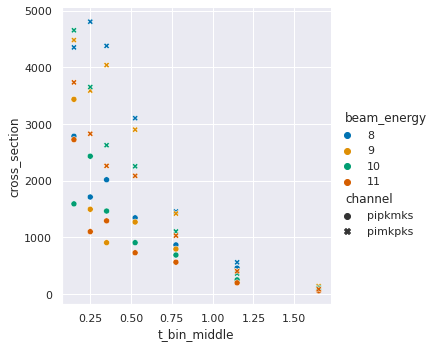

In [14]:
plot_cs = sns.relplot(data=df, x='t_bin_middle', y='cross_section', hue='beam_energy', style='channel', kind='scatter', palette='colorblind')


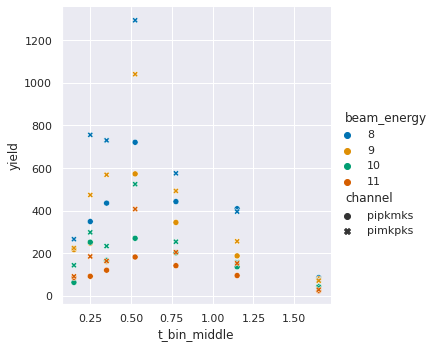

In [15]:
plot_yield = sns.relplot(data=df, x='t_bin_middle', y='yield', hue='beam_energy', style='channel', kind='scatter', palette='colorblind')

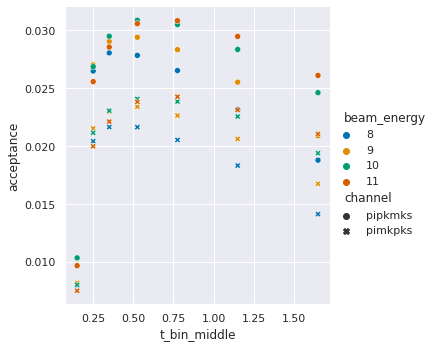

In [16]:
plot_acceptance = sns.relplot(data=df, x='t_bin_middle', y='acceptance', hue='beam_energy', style='channel', kind='scatter', palette='colorblind')

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [17]:
sns.set_style("ticks")

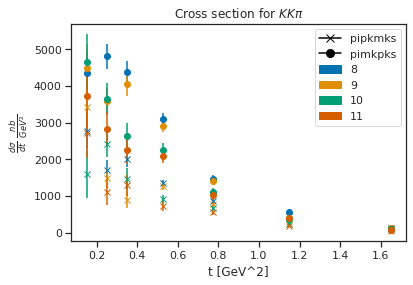

In [101]:
fig, ax = plt.subplots()
grouped = df.groupby(['beam_energy', 'channel'])
cmap = sns.color_palette(palette='colorblind', n_colors=8)

markers = {
    'pipkmks': 'x',
    'pimkpks': 'o'
}
channels = {
    'pipkmks': '$K^{-}K_{s}\pi^{+}$',
    'pimkpks': '$K^{+}K_{s}\pi^{-}$'
}

legend_markers = [mlines.Line2D([], [], color='black', marker=markers[mkr], markersize=8, label=mkr) for mkr in markers]
channel_markers = [mpatches.Patch(color=cmap[bm-8], label=bm) for bm in list(set(index[0] for index in grouped.groups.keys()))]

    

for i, ((beam, channel), group) in enumerate(grouped):
    ax.errorbar(x=group.t_bin_middle, y=group.cross_section, yerr=group.cross_section_error, marker=markers[channel], c=cmap[beam-8], ls='none')
    ax.legend(handles=legend_markers + channel_markers)
    ax.set_xlabel('t [GeV^2]')
    ax.set_ylabel('$\\frac{d\\sigma}{dt}$ $\\frac{nb}{GeV^2}$')
    ax.set_title('Cross section for $KK\pi$')
